# Chapter 6 헬로 딥러닝 MNIST

MNIST 데이터 셋을 신경망으로 학습시켜 보겠습니다.

- MNIST는 손으로 쓴 숫자들의 이미지를 모아놓은 데이터셋
- 0~9까지의 숫자를 28x28 픽셀 크기의 이미지로 구성

![http://simonwinder.com/wp-content/uploads/2015/07/mnistExamples.png](http://simonwinder.com/wp-content/uploads/2015/07/mnistExamples.png)


## one-hot encoding란?

![https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/1d8fc59e6a674f1c.png](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/1d8fc59e6a674f1c.png)

## 테스트용 데이터를 따로 구분하는 이유

머신러닝을 위한 학습 데이터는 항상 학습용과 테스트용으로 분리해서 사용합니다.

- Train dataset은 학습을 시킬 때 사용
- Test dataset은 학습이 잘 되었는지 확인할 때 사용

Train dataset으로 예측을 하면 정확도가 매우 높게 나오지만 새로운 데이터를 예측할 때는 정확도가 매우 떨어지는 경우가 많은 경우가 많습니다. 이런 상태를 보고 **Overfitting**이라 합니다.

이러한 현상을 확인하고 방지하기 위해 학습 이후 Test dataset으로 검증해야 합니다.

MNIST에서는 Train dataset 6만개와 Test dataset 1만개로 구성되어 있습니다.

![6_overfitting](6_overfitting.png)

## 6.1 MNIST 학습하기

여기서는 텐서플로가 제공하는 데이터셋을 사용합니다.

In [26]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# one_hot 인코딩 방식으로 읽어 들임
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [27]:
# 28x28 = 784개
X = tf.placeholder(tf.float32, [None, 784])
# 0~9 10개
Y = tf.placeholder(tf.float32, [None, 10])

여기서는 2개의 hidden layer를 두는 신경만을 구성해보겠습니다.

784(input layer) -> 256 (1st hidden layer) -> 256 (2nd hidden layer) -> 10 (output layer)


In [28]:
# random_normal은 주어진 표준편차의 청규분포를 가지는 임의의 값을 제공
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [29]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [30]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

MNIST는 데이터가 수만 개라서 여러 개를 한번에 학습시키면 메모리나 CPU 연산에 부하가 많이 걸립니다. 

- 그렇기 때문에 데이터를 적절한 minibatch로 잘라 학습시킵니다.

In [31]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

그리고 데이터 전체를 학습하는 일을 총 15번 반복합니다

- Train dataset 전체를 한 바퀴 도는 것을 epoch라고 합니다

In [32]:
for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], 
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
    print('Epoch:{:04d} Avg. cost ={:.3f}'.format(epoch + 1, total_cost / total_batch))

print('최적화 완료!')

Epoch:0001 Avg. cost =0.409
Epoch:0002 Avg. cost =0.155
Epoch:0003 Avg. cost =0.103
Epoch:0004 Avg. cost =0.072
Epoch:0005 Avg. cost =0.052
Epoch:0006 Avg. cost =0.042
Epoch:0007 Avg. cost =0.033
Epoch:0008 Avg. cost =0.026
Epoch:0009 Avg. cost =0.019
Epoch:0010 Avg. cost =0.018
Epoch:0011 Avg. cost =0.016
Epoch:0012 Avg. cost =0.014
Epoch:0013 Avg. cost =0.014
Epoch:0014 Avg. cost =0.010
Epoch:0015 Avg. cost =0.011
최적화 완료!


model을 구동해 나오는 결과는 아래와 같을 것입니다.

![6_argmax.png](6_argmax.png)

이제 학습이 잘 되었는지 검증해보도록 하겠습니다.

- argmax로 가장 큰 값을 가진 인덱스를 가져옵니다
- 그 인덱스로 비교해 정확도를 측정합니다.
- equal의 반환이 bool이기 때문에 float으로 casting
- 그리고 mean(평균)을 측정  
    - `(1+0+1+1+0+1) 6`

In [33]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:', sess.run(accuracy,
                      feed_dict={X: mnist.test.images,
                                 Y: mnist.test.labels}))

정확도: 0.98


In [35]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# one_hot 인코딩 방식으로 읽어 들임
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

# 28x28 = 784개
X = tf.placeholder(tf.float32, [None, 784])
# 0~9 10개
Y = tf.placeholder(tf.float32, [None, 10])

# random_normal은 주어진 표준편차의 청규분포를 가지는 임의의 값을 제공
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], 
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
    print('Epoch:{:04d} Avg. cost ={:.3f}'.format(epoch + 1, total_cost / total_batch))

print('최적화 완료!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:', sess.run(accuracy,
                      feed_dict={X: mnist.test.images,
                                 Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch:0001 Avg. cost =0.402
Epoch:0002 Avg. cost =0.145
Epoch:0003 Avg. cost =0.093
Epoch:0004 Avg. cost =0.069
Epoch:0005 Avg. cost =0.050
Epoch:0006 Avg. cost =0.039
Epoch:0007 Avg. cost =0.030
Epoch:0008 Avg. cost =0.025
Epoch:0009 Avg. cost =0.021
Epoch:0010 Avg. cost =0.017
Epoch:0011 Avg. cost =0.017
Epoch:0012 Avg. cost =0.016
Epoch:0013 Avg. cost =0.011
Epoch:0014 Avg. cost =0.011
Epoch:0015 Avg. cost =0.012
최적화 완료!
정확도: 0.9803


## 6.2 드롭아웃

Dropout은 Overfitting을 막기 위해 사용되는 방법 중 가장 효과가 좋은 방법 중 하나입니다.

Dropout의 원리는 학습 시 전체 신경망 중 일부만을 사용하도록 하는 것입니다.

- 즉 학습 단계마다 일부 뉴런을 제거함으로써 일부 특징이 특정 뉴런들에 고정되는 것을 막아 가중치의 균형을 잡도록 도와줍니다.
- 다만, 학습시간은 증가하게 됩니다.

![6_dropout](6_dropout.png)

위의 모델에 Dropout을 적용하면 아래처럼 수정하면 됩니다.

- keep_prob는 학습시에는 0.8을 넣고 예측시에는 1을 넣어 dropout 비율을 조절하기 위해 사용합니다.

```py
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

# 학습 코드
_, cost_val = sess.run([optimizer, cost], 
    feed_dict={X: batch_xs,Y: batch_ys, keep_prob: 0.8})

# 예측 코드: keep_prob를 1로 넣어줍니다.
print('정확도:', sess.run(accuracy,
    feed_dict={X: mnist.test.images,Y: mnist.test.labels, keep_prob: 1})
```

드롭 아웃을 적용하면 학습이 느리게 진행되기 때문에(학습 속도가 느림) epoch도 더 늘리도록 하겠습니다.

In [36]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], 
                               feed_dict={X: batch_xs, Y: batch_ys, 
                                          keep_prob: 0.8})
        total_cost += cost_val
    print('Epoch:{:04d} Avg. cost ={:.3f}'.format(epoch + 1, total_cost / total_batch))

print('최적화 완료!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:', sess.run(accuracy,
                      feed_dict={X: mnist.test.images,
                                 Y: mnist.test.labels,
                                 keep_prob: 1}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch:0001 Avg. cost =0.443
Epoch:0002 Avg. cost =0.166
Epoch:0003 Avg. cost =0.114
Epoch:0004 Avg. cost =0.091
Epoch:0005 Avg. cost =0.074
Epoch:0006 Avg. cost =0.062
Epoch:0007 Avg. cost =0.053
Epoch:0008 Avg. cost =0.048
Epoch:0009 Avg. cost =0.043
Epoch:0010 Avg. cost =0.038
Epoch:0011 Avg. cost =0.035
Epoch:0012 Avg. cost =0.031
Epoch:0013 Avg. cost =0.030
Epoch:0014 Avg. cost =0.029
Epoch:0015 Avg. cost =0.025
Epoch:0016 Avg. cost =0.028
Epoch:0017 Avg. cost =0.024
Epoch:0018 Avg. cost =0.022
Epoch:0019 Avg. cost =0.021
Epoch:0020 Avg. cost =0.020
Epoch:0021 Avg. cost =0.020
Epoch:0022 Avg. cost =0.019
Epoch:0023 Avg. cost =0.021
Epoch:0024 Avg. cost =0.016
Epoch:0025 Avg. cost =0.019
Epoch:0026 Avg. cost =0.017
Epoch:0027 Avg. cost =0.017
Epoch:0028 Avg. cost =0.017
Epoch:0029 Avg

다른 방법으로는 batch normalization이라는 기법도 있는데 영기선 생략하겠습니다.

- overfitting를 막아주고 학습 속도도 향상됨

## 6.3 matplotlib

matplotlib은 시각화를 위한 그래프를 쉽게 그릴 수 있도록 도와주는 파이썬 라이브러리입니다.

이번 절에서는 matplotlib을 이용해 학습 결과를 손글씨 이미지로 확인해보는 간단한 예제를 만들어 보겠습니다.

앞절에서 작성한 코드에 아래 코드를 추가합니다.


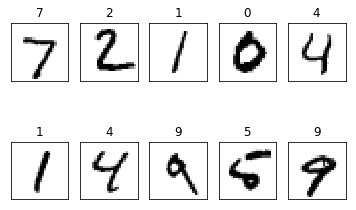

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 테스트 데이터를 이용해 예측 모델을 실행한 결과값을 저장
labels = sess.run(model,
                 feed_dict={X: mnist.test.images,
                            Y: mnist.test.labels,
                            keep_prob: 1})

# 2. 손글씨를 출력할 그래프를 준비
fig = plt.figure()

# 3. 테스트 데이터의 첫 번째부터 열 번째까지의 이미지와 예측한 값을 출력
for i in range(10):
    # 4. 2행 5열의 그래프를 만들고 i+1번째 숫자 이미지를 출력
    subplot = fig.add_subplot(2, 5, i+1)
    # 5. 깨끗한 이미지를 출력하기 위해 눈금을 삭제
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 6. 출력한 이미지 위에 예측한 숫자를 출력
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    # 7. 1차원 배열로 되어 있는 이미지를 28x28로 변형하여 출력
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                  cmap=plt.cm.gray_r)
# 8. 그래프 출력
plt.show()
    